# Задание 1



Реализуйте алгоритм K ближайших соседей для классификации.

* Создайте искуственный набор данных из 100 наблюдений с 3 классами.
* Реализуйте функцию, которая получает на вход тренировочный и тестовый наборы данных и  k  - количество ближайших соседей, и возвращает метки тестового набора данных
* Используйте евклидову меру
* Если возникает неопределенность (например, все три соседа имеют разные метки классов), то присвойте класс случайным образом
* Проверьте качество классификации для различных параметров  k  (1, 3, 5, 7, 9) метрикой Accuracy (доля правильных ответов)
* Постройте разделяющие поверхности классификатора



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, 
                  cluster_std = 2, random_state=17)

Text(0.5, 1.0, 'Initial data')

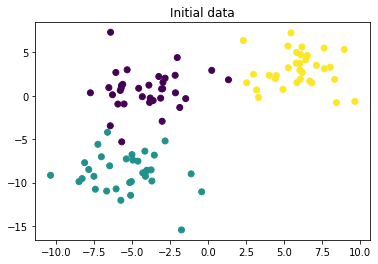

In [3]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [4]:
from math import sqrt
from collections import Counter


def euclidean_distance(x0, x1):
    return sqrt(np.sum((x0 - x1) ** 2)) 


def kNN(x_train, y_train, x_test, k):
    pred_labels = []
    for test_point in x_test:
        distances = []
        for train_point in x_train:
            distance = euclidean_distance(test_point, train_point)
            distances.append(distance)
        distances = np.asarray(distances)
        counter = Counter(y_train[distances.argsort()[:k]])
        prediction = counter.most_common()[0][0]
        pred_labels.append(prediction)    
    return pred_labels

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,
                                                   random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

def accuracy(y_test, y_pred):
  return np.sum(y_test == y_pred) / len(y_pred)

def draw_class_border(clf, X, Y, k, h=.05, cmap=plt.cm.coolwarm):
  x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
  y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

  Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(7,7))
  plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
  plt.scatter(X[:,0], X[:,1], s=200, c = Y, cmap=cmap)
  plt.title(f"k = {k}")
  plt.show()

Accuracy score нашего классификатора для k = 1: 0.96
Accuracy score классификатора из sklearn для k = 1: 0.96


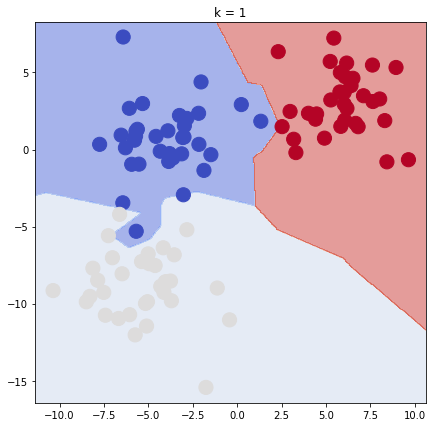

Accuracy score нашего классификатора для k = 3: 1.0
Accuracy score классификатора из sklearn для k = 3: 1.0


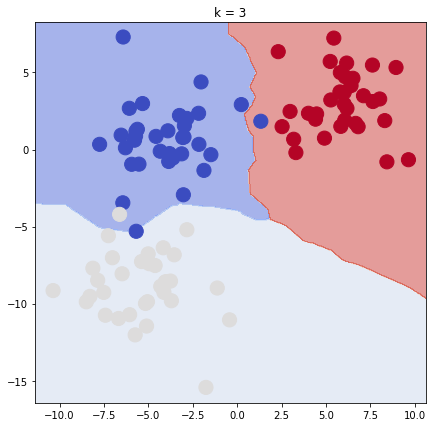

Accuracy score нашего классификатора для k = 5: 1.0
Accuracy score классификатора из sklearn для k = 5: 1.0


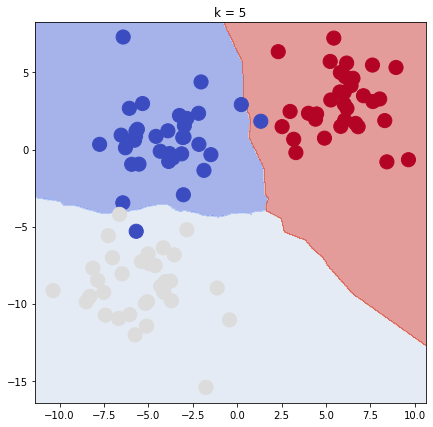

Accuracy score нашего классификатора для k = 7: 1.0
Accuracy score классификатора из sklearn для k = 7: 1.0


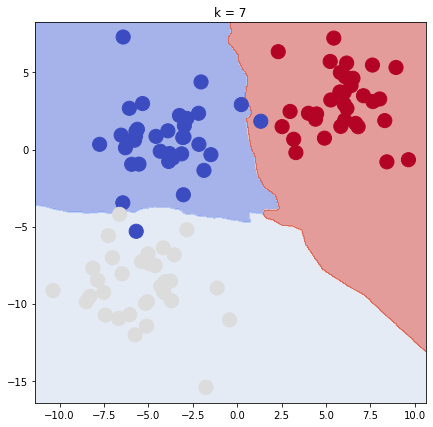

Accuracy score нашего классификатора для k = 9: 1.0
Accuracy score классификатора из sklearn для k = 9: 1.0


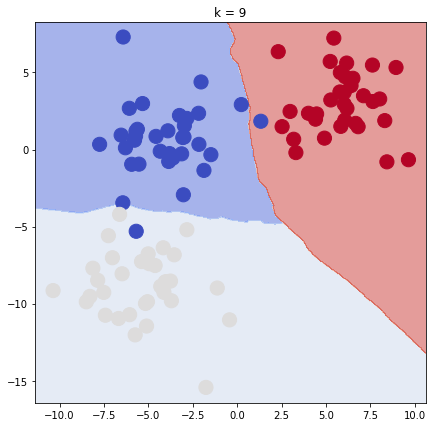

In [7]:
for k in range(1, 11, 2):
    print(f"Accuracy score нашего классификатора для k = {k}: {accuracy(y_test, kNN(x_train, y_train, x_test, k))}")
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(f"Accuracy score классификатора из sklearn для k = {k}: {accuracy(y_test, y_pred)}")
    draw_class_border(clf, X, Y, k)

# Задание 2


Реализуйте алгоритм K ближайших соседей для регрессии.

* создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 15 случайных точек как тренировочную выборку.
* предскажите функцию на всем диапазоне [0, 5] для всех возможных значений параметра  k .
* постройте на одном графике исходную функцию, тренировочные объекты и предсказанные для каждого значения  k.

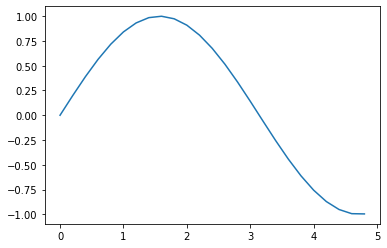

In [8]:
x = np.arange(0,5,0.2)
y = np.sin(x)

x_train = np.random.choice(x, size=15)
y_train = np.sin(x_train)

plt.plot(x,y)
plt.show()

In [9]:
def kNN_regressor(x_train, y_train, x_test, k):
    pred_labels = []
    for test_point in x_test:
        distances = []
        for train_point in x_train:
            distance = euclidean_distance(test_point, train_point)
            distances.append(distance)
        distances = np.asarray(distances)
        prediction = np.mean(y_train[distances.argsort()[:k]])
        pred_labels.append(prediction)    
    return pred_labels

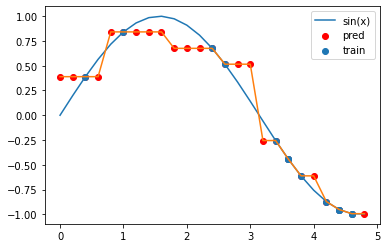

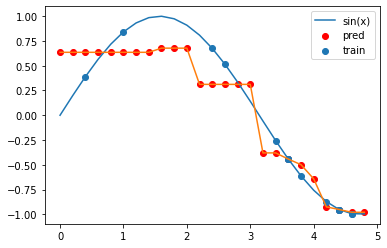

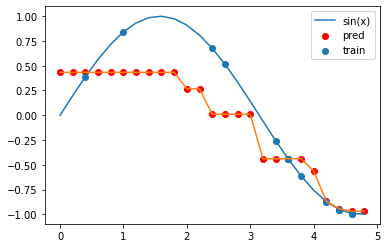

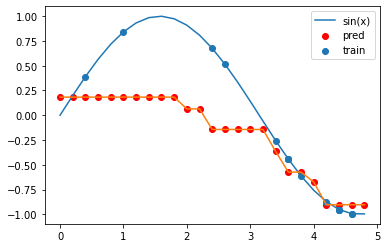

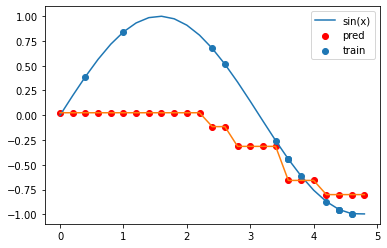

In [10]:
for k in range(1, 11, 2):
  y_pred = kNN_regressor(x_train, y_train, x, k)
  plt.plot(x, y, label='sin(x)')
  plt.plot(x, y_pred)
  plt.scatter(x, y_pred, label='pred', c='red')
  plt.scatter(x_train, y_train, label='train') 
  plt.legend()
  plt.show()